In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import *
from model.classification import *

from tqdm.notebook import tqdm
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['agg.path.chunksize'] = 10000

params = EasyDict()
params.n_fft = 1024
params.n_mels = 64
params.hop_length = 128
params.sr = 44100
predictions = None

In [3]:
file = '20190819-Kutna Hora-L10-out-SDV_1888'

signal = load_audio(f'data/audio/{file}.MP4.wav')
csv = load_csv(f'{file}.MP4')
best_detection_frame = load_best_detection_frame_time_from_csv(csv)
views = load_views_from_csv(csv)

try:
    manual_events = load_events(f'data/labels/{file}.MP4.txt')
except:
    manual_events = None

events_start_time, events_end_time = load_event_time_from_csv(csv)

In [6]:
uuid = 1639067561
# rvce / mae / chd / last
model_name = 'rvce'
from_time, till_time = 0*60, 10*60
# from_time, till_time = 942, 2064

model, config = load_model_locally(uuid, model_name=model_name)
transform = create_transformation(config)
predictions, probabilities = validate(signal, model, transform, config, from_time=from_time, till_time=till_time, return_probs=True)

00:00 - 10:00


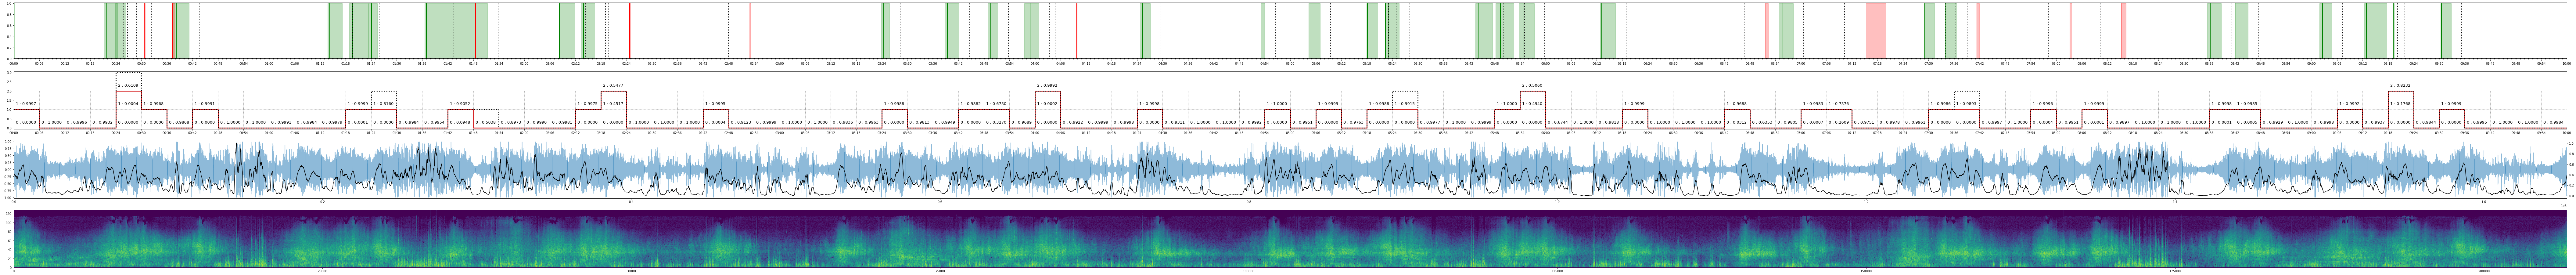

In [7]:
show(
    config,
    signal=signal,
    events=best_detection_frame, 
    predictions=predictions,
    probabilities=probabilities,
    events_start_time=events_start_time,
    events_end_time=events_end_time,
    manual_events=manual_events,
    views=views,
    from_time=from_time,
    till_time=till_time,
    save=False
)
show_video(file)

In [33]:
file = '20190819-Kutna Hora-L10-out-SDV_1888'
show_video(file)

In [37]:
from glob import glob

videos = glob('data/for_manual_annotation/*')

def show_video_2(file, scale=0.3):
    from IPython.display import HTML
    return HTML(f"""
        <video width="{1920 * scale}" height="{1080 * scale}" controls>
            <source src="{file}" type="video/mp4">
        </video>
    """)

video_n = 335
print(videos[video_n])
file = 'data/for_manual_annotation/20190819-Kutna Hora-L10-out-SDV_1888_07.07_07.53.MP4'
show_video_2(file)
# show_video_2(videos[video_n])

data/for_manual_annotation/20190819-Ricany-L8-in-MVI_0009_21.44_22.13.MP4


### Visualize all videos

In [ ]:
files = [
    '20190819-Kutna Hora-L1-out-MVI_0007',
    '20190819-Kutna Hora-L3-in-MVI_0005',
    '20190819-Kutna Hora-L3-out-MVI_0008',
    '20190819-Kutna Hora-L4-in-MVI_0013',
    '20190819-Kutna Hora-L5-in-MVI_0003',
    '20190819-Kutna Hora-L6-out-MVI_0017',
    '20190819-Kutna Hora-L7-out-MVI_0032',
    '20190819-Kutna Hora-L8-in-MVI_0045',
    '20190819-Kutna Hora-L9-in-MVI_0043',
    '20190819-Kutna Hora-L10-out-SDV_1888',
    '20190819-Kutna Hora-L13-in-MVI_0006',
    '20190819-Kutna Hora-L13-out-MVI_0018',
    '20190819-Kutna Hora-L14-out-MVI_0005',
    '20190819-Kutna Hora-L15-out-MVI_0012',
    '20190819-Kutna Hora-L16-out-MVI_0003',
    '20190819-Kutna Hora-L18-in-MVI_0030',
    '20190819-Ricany-L2-in-MVI_0006',
    '20190819-Ricany-L2-out-MVI_0005',
    '20190819-Ricany-L3-in-MVI_0006',
    '20190819-Ricany-L6-in-MVI_0008',
    '20190819-Ricany-L6-out-MVI_0011',
    '20190819-Ricany-L7-in-MVI_0008',
    '20190819-Ricany-L7-out-MVI_0013',
    '20190819-Ricany-L8-in-MVI_0009',
    '20190819-Ricany-L8-out-MVI_0013',
    '20190819-Ricany-L9-in-MVI_0008',
    '20190819-Ricany-L9-out-MVI_0011'
]

window_length = 6
split_ratio = 0.75

datapool = DataPool(files, window_length, split_ratio, tqdm=tqdm)

In [ ]:
uuid = 1635061611
suffix = 'interval'

# for file in tqdm(files):
for video in tqdm(datapool):
    file = video.file
    signal = video.signal
    csv = load_csv(f'{file}.MP4')
    best_detection_frame = load_best_detection_frame_time_from_csv(csv)
    directions = load_directions_from_csv(csv)
    views = load_views_from_csv(csv)
    
    print(file)

    try:
        manual_events = load_events(f'data/labels/{file}.MP4.txt')
    except:
        manual_events = None

    events_start_time, events_end_time = load_event_time_from_csv(csv)
    
    model, params = load_model(uuid, suffix=suffix)
    transform = create_transformation(params)
    
    is_trn = True
    from_time, till_time = video.get_from_till_time(is_trn)
    from_time = int(from_time)
    till_time = int(till_time)
    predictions, probabilities = validate(signal, model, transform, params, from_time=from_time, till_time=till_time, return_probs=True)
    
    show(
        params,
        signal=signal,
        events=best_detection_frame, 
        predictions=predictions,
        probabilities=probabilities,
        events_start_time=events_start_time,
        events_end_time=events_end_time,
        manual_events=manual_events,
        views=views,
        from_time=from_time,
        till_time=till_time,
        save=False
    )
    
    is_trn = False
    from_time, till_time = video.get_from_till_time(is_trn)
    from_time = int(from_time)
    till_time = int(till_time)
    predictions, probabilities = validate(signal, model, transform, params, from_time=from_time, till_time=till_time, return_probs=True)
    plt.close('all')
        
    show(
        params,
        signal=signal,
        events=events, 
        predictions=predictions,
        probabilities=probabilities,
        events_start_time=events_start_time,
        events_end_time=events_end_time,
        manual_events=manual_events,
        views=views,
        from_time=from_time,
        till_time=till_time,
        save=False
    )
    
    plt.close('all')